# Example of iPROF nc file content

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import ecco_v4_py as ecco
import xmitgcm

import os
import warnings
warnings.simplefilter('ignore')
os.environ['PYTHONWARNOINGS'] = 'ignore'

In [3]:
path=f'/scratch/fhabbal/aste_270x450x180/run_template/input_insitu/+aste/+18x18'

In [4]:
ds = xr.open_dataset(f'{path}/argo_feb2016_2013_llc270_18x18_ASTE.nc')
ds

<xarray.Dataset>
Dimensions:              (iDEPTH: 55, iINTERP: 1, iPROF: 36523)
Dimensions without coordinates: iDEPTH, iINTERP, iPROF
Data variables:
    prof_depth           (iDEPTH) float64 ...
    prof_descr           (iPROF) |S30 ...
    prof_date            (iPROF) float64 ...
    prof_YYYYMMDD        (iPROF) float64 ...
    prof_HHMMSS          (iPROF) float64 ...
    prof_lon             (iPROF) float64 ...
    prof_lat             (iPROF) float64 ...
    prof_basin           (iPROF) float64 ...
    prof_point           (iPROF) float64 ...
    prof_T               (iPROF, iDEPTH) float64 ...
    prof_Tweight         (iPROF, iDEPTH) float64 ...
    prof_Testim          (iPROF, iDEPTH) float64 ...
    prof_Terr            (iPROF, iDEPTH) float64 ...
    prof_Tflag           (iPROF, iDEPTH) float64 ...
    prof_S               (iPROF, iDEPTH) float64 ...
    prof_Sweight         (iPROF, iDEPTH) float64 ...
    prof_Sestim          (iPROF, iDEPTH) float64 ...
    prof_Serr            (iPROF, iDEPTH) float64 ...
    prof_Sflag           (iPROF, iDEPTH) float64 ...
    prof_interp_XC11     (iPROF) float64 ...
    prof_interp_YC11     (iPROF) float64 ...
    prof_interp_XCNINJ   (iPROF) float64 ...
    prof_interp_YCNINJ   (iPROF) float64 ...
    prof_interp_i        (iPROF, iINTERP) float64 ...
    prof_interp_j        (iPROF, iINTERP) float64 ...
    prof_interp_lon      (iPROF, iINTERP) float64 ...
    prof_interp_lat      (iPROF, iINTERP) float64 ...
    prof_interp_weights  (iPROF, iINTERP) float64 ...
Attributes:
    description:  Format: MITprof netcdf. This file was created using \nthe m...
    date:         04-Jul-2017

In [5]:
(unique, counts) = np.unique(ds.prof_date, return_counts=True)

dates = unique[np.where(counts == max(counts))[0]]
dates

array([735268.43333333, 735345.48402778, 735364.52708333, 735388.61597222,
       735400.52569444, 735403.48472222, 735409.56736111, 735410.56597222,
       735412.56319444, 735412.56527778, 735454.81666667, 735468.56875   ])

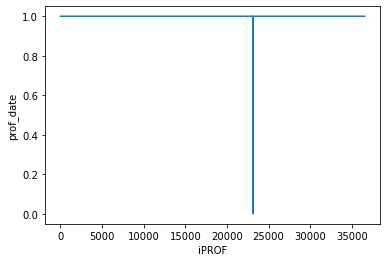

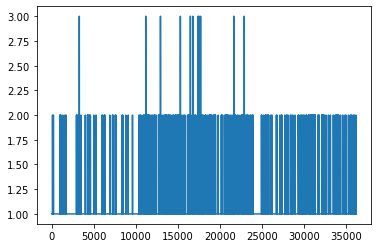

In [6]:
np.isnan(ds.prof_date.where( ds.prof_date == dates[-1] )).plot()
plt.show()

plt.figure()
plt.plot(counts)
plt.show()

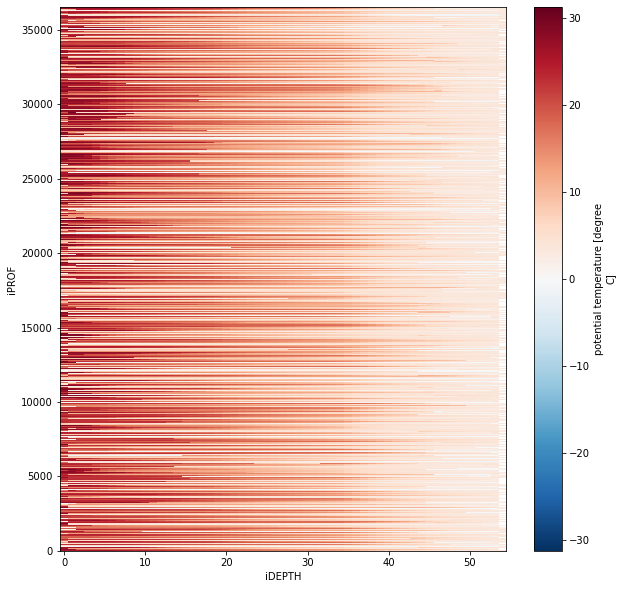

In [7]:
plt.figure(figsize=(10,10))
ds.prof_T.plot()
plt.show()

In [8]:
ds = xr.open_dataset(f'{path}/ctd_santa_anna_llc270_18x18_july2017_ASTE.nc')
ds.isel(prof_depth=10)

ValueError: dimensions {'prof_depth'} do not exist. Expected one or more of Frozen(SortedKeysDict({'iDEPTH': 39, 'iPROF': 173, 'iINTERP': 1}))

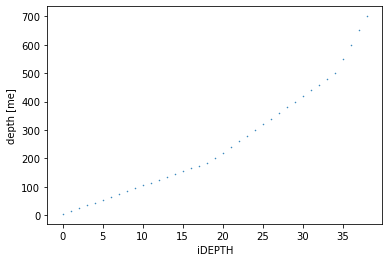

In [6]:
ds.prof_depth.plot(marker='o', linewidth=0., markersize=0.5)

In [7]:
ds = xr.open_dataset('/home/fhabbal/curr_scratch/run_FW_runoff_aste_iceplume_pickup7_Exp1_osnap_PISMv3_10mRadConeARL/ARL_profile7_2017_30x30.nc')
ds

<xarray.Dataset>
Dimensions:              (iDEPTH: 85, iINTERP: 1, iPROF: 96000)
Dimensions without coordinates: iDEPTH, iINTERP, iPROF
Data variables:
    prof_depth           (iDEPTH) float64 ...
    prof_descr           (iPROF) |S30 ...
    prof_date            (iPROF) float64 ...
    prof_YYYYMMDD        (iPROF) float64 ...
    prof_HHMMSS          (iPROF) float64 ...
    prof_lon             (iPROF) float64 ...
    prof_lat             (iPROF) float64 ...
    prof_basin           (iPROF) float64 ...
    prof_point           (iPROF) float64 ...
    prof_T               (iPROF, iDEPTH) float64 ...
    prof_Tweight         (iPROF, iDEPTH) float64 ...
    prof_Testim          (iPROF, iDEPTH) float64 ...
    prof_Terr            (iPROF, iDEPTH) float64 ...
    prof_Tflag           (iPROF, iDEPTH) float64 ...
    prof_S               (iPROF, iDEPTH) float64 ...
    prof_Sweight         (iPROF, iDEPTH) float64 ...
    prof_Sestim          (iPROF, iDEPTH) float64 ...
    prof_Serr            (iPROF, iDEPTH) float64 ...
    prof_Sflag           (iPROF, iDEPTH) float64 ...
    prof_interp_XC11     (iPROF) float64 ...
    prof_interp_YC11     (iPROF) float64 ...
    prof_interp_XCNINJ   (iPROF) float64 ...
    prof_interp_YCNINJ   (iPROF) float64 ...
    prof_interp_i        (iPROF, iINTERP) float64 ...
    prof_interp_j        (iPROF, iINTERP) float64 ...
    prof_interp_lon      (iPROF, iINTERP) float64 ...
    prof_interp_lat      (iPROF, iINTERP) float64 ...
    prof_interp_weights  (iPROF, iINTERP) float64 ...
Attributes:
    description:  Format: MITprof netcdf. This file was created using \nthe m...
    date:         29-Jul-2021

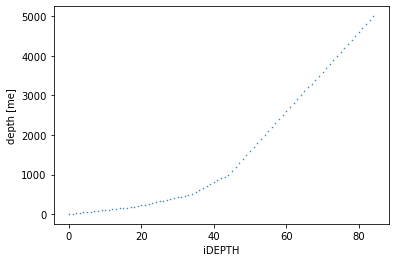

In [8]:
ds.prof_depth.plot(marker='o', linewidth=0., markersize=0.5)